In [11]:
%load_ext autoreload
%autoreload 2
from sgtaxidata import *
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt


DBNAME='../taxis.db'
DATE='20170626'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
dates=taxis.get_dates(DBNAME)
dates

['20170624',
 '20170625',
 '20170626',
 '20170627',
 '20170628',
 '20170629',
 '20170630',
 '20170701',
 '20170702',
 '20170703',
 '20170704',
 '20170705',
 '20170706',
 '20170707',
 '20170708']

In [13]:
lat,lon=utils.get_lat_long("Buangkok")
print lat,lon

1.3830715 103.8931105


In [14]:
data=[analysis.get_weekday_data(date,DBNAME,lat,lon,holidays=[DATE]) for date in dates]
data=[x for x in data if x is not None]

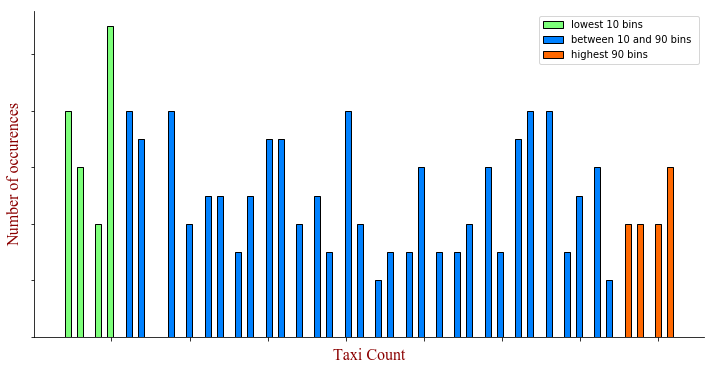

In [15]:
d=data[4]
visualize.plot_hist(d['TaxiCount'])

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


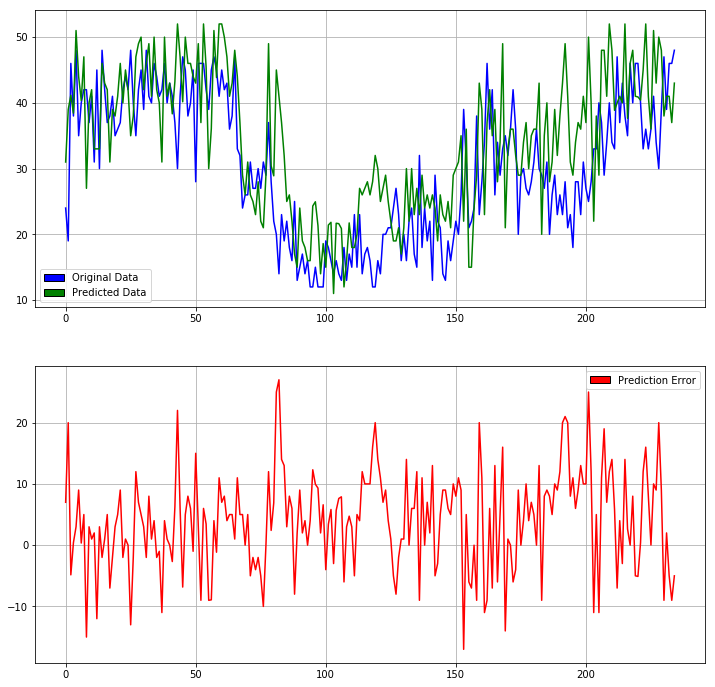

In [16]:
kn=KNeighborsRegressor(weights='distance')
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    kn.fit(X,y)
    print kn.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,kn)

/Users/hari/python/py2/taxidata/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.85691580557
0.556726117863
0.681275109489
0.708771977982
0.718007746942
0.473107572762
0.590965828142
0.451869221006
0.654940777218


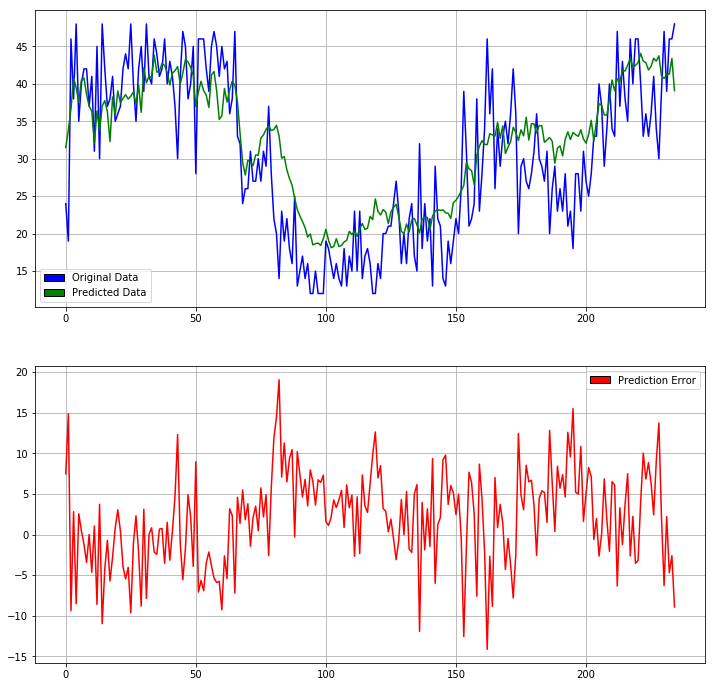

In [17]:
rf=RandomForestRegressor(n_estimators=10,n_jobs=10,warm_start=True)
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    rf.fit(X,y)
    rf.n_estimators+=10
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,rf)

-0.640395920818
0.737705347983
0.684212917644
0.736167105614
0.659981602057
0.51687324951
0.598717875177
0.431037350848
0.654940777218


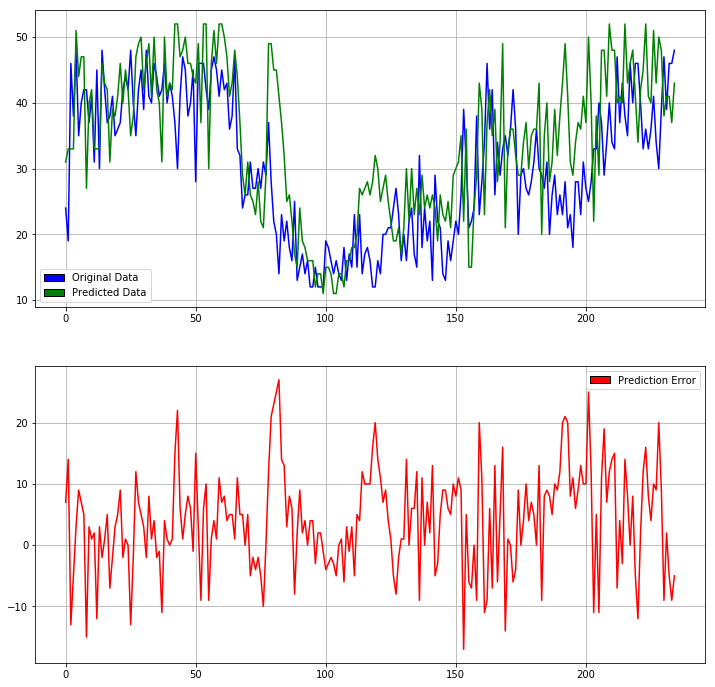

In [18]:
dt=DecisionTreeRegressor()
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    dt.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,dt)

-0.640395920818
0.737705347983
0.684212917644
0.736167105614
0.659981602057
0.51687324951
0.598717875177
0.431037350848
0.654940777218


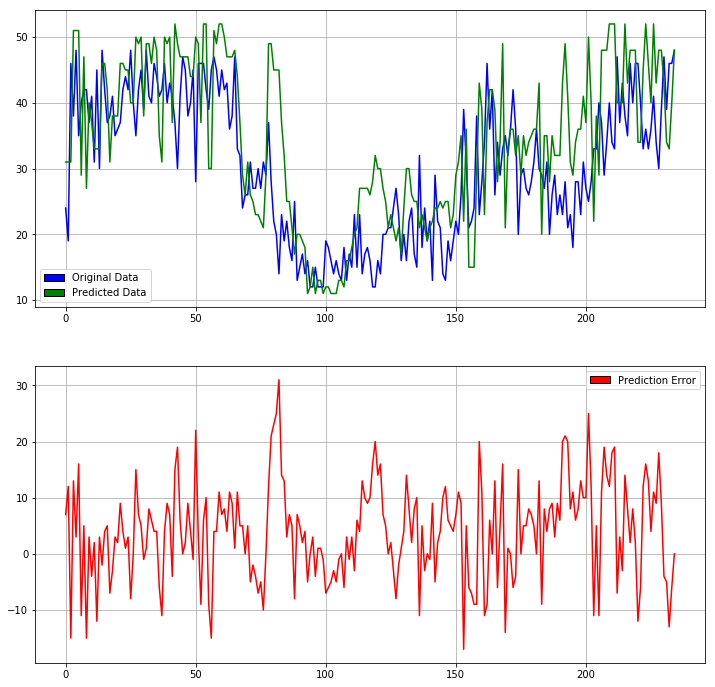

In [19]:
ab=AdaBoostRegressor(DecisionTreeRegressor(),n_estimators=300,loss='square')
for df in data[:-1]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    ab.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,ab)

0.737705347983


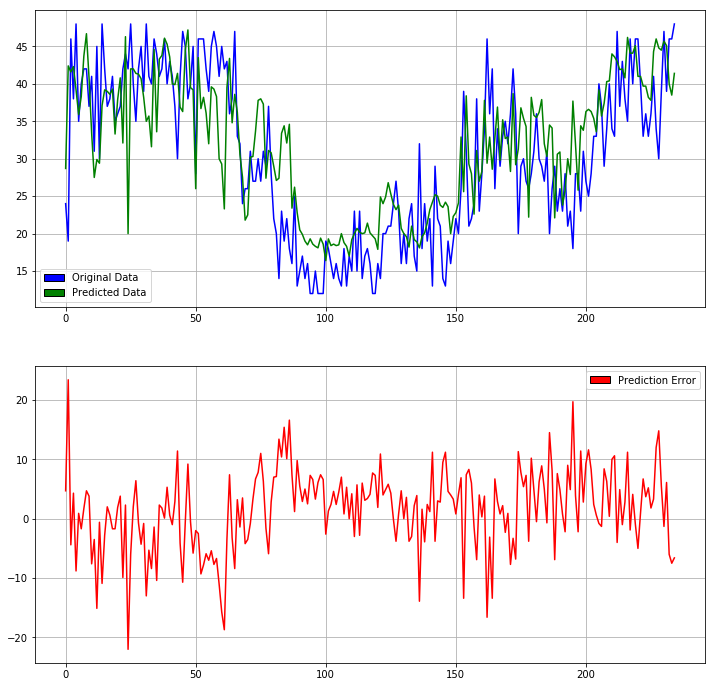

In [23]:
ab=AdaBoostRegressor(RandomForestRegressor(),n_estimators=300,loss='exponential')
for df in data[1:2]:
    X=df.drop(['TaxiCount'],axis=1).as_matrix()
    y=np.array(df['TaxiCount'].tolist()).reshape(-1,1)
    ab.fit(X,y)
    print rf.score(X,y)
    
test=data[-1]

Xt=test.drop(['TaxiCount'],axis=1).as_matrix()
yt=np.array(test['TaxiCount'].tolist()).reshape(-1,1)

visualize.plot_model(Xt,yt,ab)